# Introduction

In this Jupyter Notebook, we undertake a machine learning project to predict whether sheep (ewes) are likely to be sick based on various physiological measurements such as acceleration, ear temperature, ambient temperature, and more. This research is crucial for early detection of illness in livestock, potentially aiding in timely medical intervention and better farm management.

# Setup

**Libraries and Dependencies**: The notebook utilizes Python libraries such as Pandas for data manipulation, Matplotlib and Seaborn for data visualization, Scikit-learn for machine learning, and TensorFlow for constructing neural network models.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Data Loading and Preprocessing

**Data Loading**: The dataset is loaded from an Excel file, providing initial insights into the structure and type of data collected. 

**Preprocessing**: We handle missing data (if any) and transform categorical variables into numeric. This step includes normalization or scaling if necessary, especially important for models like KNN and SVM.

In [2]:
data = pd.read_excel('sheep_data.xlsx')
data.head()

data.isnull().sum()

data.describe()


,Ewe,Eday,Hour,accel,eartemp,ambtemp
count,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000
mean,602.373066,-0.453367,11.474279,132.658136,82.754734,68.162130
std,90.337441,3.031808,6.949133,135.436867,25.551007,13.738572
min,453.000000,-7.000000,0.000000,0.000000,33.476000,31.760000
25%,544.000000,-3.000000,5.000000,29.800000,75.338500,58.492000
50%,601.000000,0.000000,11.000000,82.400000,83.146000,69.215000
75%,706.000000,2.000000,18.000000,200.400000,89.586000,78.157500
max,742.000000,5.000000,23.000000,691.400000,285.302000,99.865000


# Exploratory Data Analysis (EDA)

**Correlation Analysis**: We explore how different physiological measurements relate to each other and their correlation with the sickness outcome.

C:\Users\steve\AppData\Local\Temp\ipykernel_4008\4026175683.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


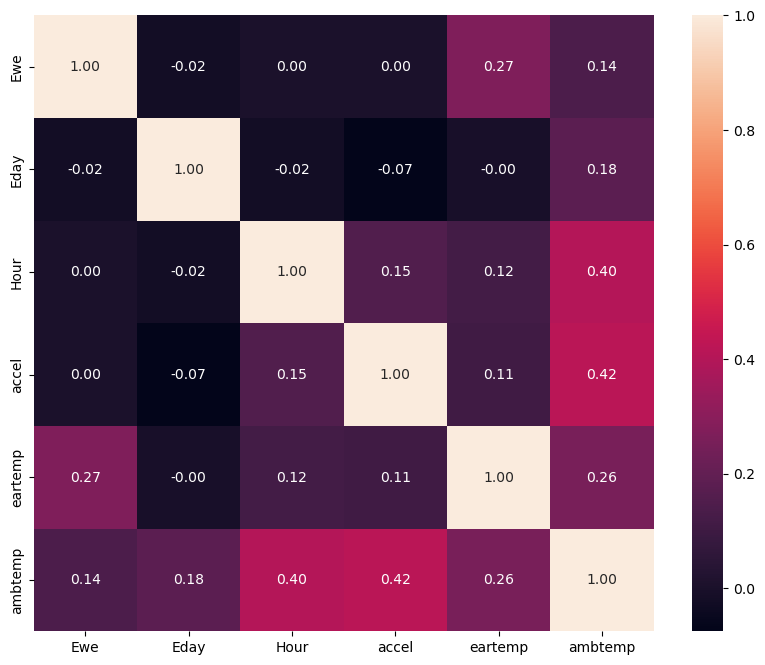

In [3]:
# Compute correlations
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

# Model Building

**Feature Selection and Model Training**: Various models are built to predict sheep sickness, including Random Forest, Logistic Regression, SVM, Naive Bayes, Neural Networks, and LSTM models. We evaluate the importance of features using a Random Forest classifier.

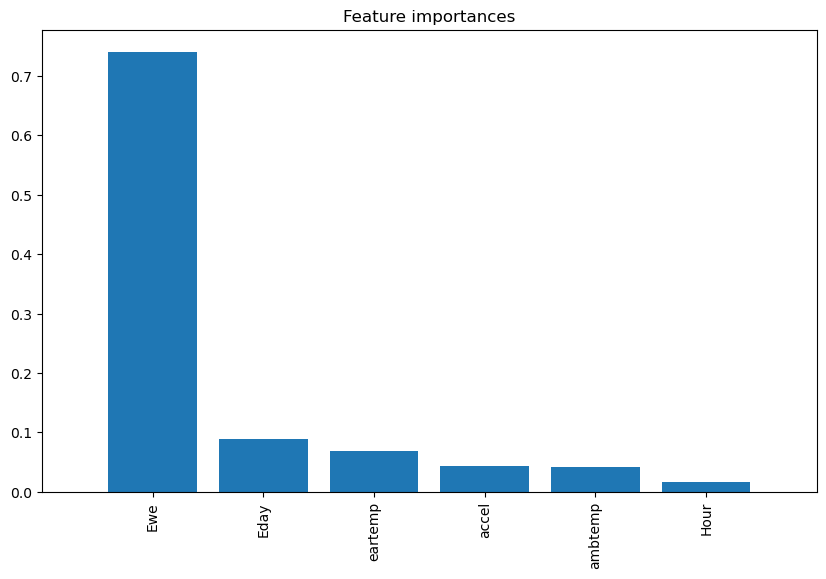

In [4]:
# Sick is the target variable
X = data.drop(['sick'], axis=1)
y = data['sick']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting a random forest to find feature importance
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

# Plotting feature importances
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


# Results and Discussion

**Model Evaluation**: Each model is evaluated using accuracy, precision, recall, F1 score, and ROC AUC. The results help determine the best-performing models and understand their strengths and weaknesses in context.

The evaluation metrics used include:
- Accuracy: Measures the overall correctness of the model.
- Precision: Reflects the ratio of true positives to the sum of true and false positives, indicating the accuracy of positive predictions.
- Recall: Measures the model's ability to detect positive samples (the proportion of actual positives correctly identified).
- F1 Score: A harmonic mean of precision and recall, providing a balance between these metrics for situations where an equal trade-off is required.
- ROC AUC: Represents the model's ability to discriminate between the classes at various threshold settings.

In [5]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")


# Logistic Regression Model Training and Evaluation

In this section, we implement a Logistic Regression model to classify sheep as either sick ('symptom') or not sick ('nosymp'). Logistic Regression is chosen for its efficiency and effectiveness in binary classification tasks.

In [6]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Convert categorical target to numeric
y_train_numeric = y_train.map({'nosymp': 0, 'symptom': 1})
y_test_numeric = y_test.map({'nosymp': 0, 'symptom': 1})

# Then, use these numeric targets for model training and evaluation
log_reg.fit(X_train, y_train_numeric)
evaluate_model(log_reg, X_test, y_test_numeric)

Accuracy: 0.6198
Precision: 0.5068
Recall: 0.2691
F1 Score: 0.3515
ROC AUC: 0.5533


# Random Forest Classifier Training and Evaluation

In this section, we deploy the Random Forest Classifier to predict whether sheep are exhibiting symptoms of sickness. The Random Forest algorithm is selected for its robustness and ability to handle non-linear data through ensemble learning, where multiple decision trees are combined to improve prediction accuracy and control overfitting.

In [7]:
# Convert categorical target to numeric
y_train_numeric = y_train.map({'nosymp': 0, 'symptom': 1})
y_test_numeric = y_test.map({'nosymp': 0, 'symptom': 1})

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train_numeric)
evaluate_model(rf, X_test, y_test_numeric)

Accuracy: 0.9986
Precision: 1.0000
Recall: 0.9964
F1 Score: 0.9982
ROC AUC: 0.9982


# Neural Network Configuration and Compilation

In this segment of the notebook, we construct a Neural Network using TensorFlow's Keras API to classify sheep based on whether they are exhibiting symptoms of sickness. This model is designed to leverage the capabilities of deep learning for pattern recognition in complex datasets.

In [8]:
# Define the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer: Adjust the input shape to match your feature count
    layers.Dense(32, activation='relu'),  # Hidden layer: You can modify the number of neurons
    layers.Dense(1, activation='sigmoid')  # Output layer: Using sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',  # Optimizer
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])  # Metrics to be evaluated

# Summary of the model
model.summary()


C:\Anaconda\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

# Training the Neural Network

This section details the training process for the neural network designed to classify sheep based on health status indicators. The network has been configured to optimize its parameters over a specified number of iterations through the dataset.

In [9]:
history = model.fit(X_train, y_train_numeric,  # Make sure your y_train is numeric
                    epochs=100,  # Number of epochs: Adjust based on when you see convergence
                    batch_size=32,  # Batch size: You can adjust this
                    validation_split=0.2,  # Use part of the training data for validation
                    verbose=1)  # Show training log

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4861 - loss: 18.8109 - precision: 0.4097 - recall: 0.6474 - val_accuracy: 0.4627 - val_loss: 1.9608 - val_precision: 0.4187 - val_recall: 0.9098
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5532 - loss: 1.3476 - precision: 0.4438 - recall: 0.5237 - val_accuracy: 0.5403 - val_loss: 0.9181 - val_precision: 0.4173 - val_recall: 0.3985
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5780 - loss: 0.8777 - precision: 0.4557 - recall: 0.3928 - val_accuracy: 0.5522 - val_loss: 0.7980 - val_precision: 0.4341 - val_recall: 0.4211
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5794 - loss: 0.7963 - precision: 0.4764 - recall: 0.4135 - val_accuracy: 0.5582 - val_loss: 0.7601 - val_precision: 0.4400 - val_recall: 0.4135
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5849 - loss: 0.7537 - precision: 0.4778 - recall: 0.4428 - val_accuracy: 0.4955 - val_loss: 0.8032

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6747 - loss: 0.6037 - precision: 0.5664 - recall: 0.4170 - val_accuracy: 0.6388 - val_loss: 0.6524 - val_precision: 0.5330 - val_recall: 0.7293
Epoch 35/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6765 - loss: 0.6323 - precision: 0.6020 - recall: 0.5256 - val_accuracy: 0.6328 - val_loss: 0.6248 - val_precision: 0.5287 - val_recall: 0.6917
Epoch 36/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6633 - loss: 0.6192 - precision: 0.6068 - recall: 0.4944 - val_accuracy: 0.6269 - val_loss: 0.6256 - val_precision: 0.5769 - val_recall: 0.2256
Epoch 37/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - loss: 0.6549 - precision: 0.5732 - recall: 0.4118 - val_accuracy: 0.6299 - val_loss: 0.8409 - val_precision: 0.9091 - val_recall: 0.0752
Epoch 38/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6185 - loss: 0.7239 - precision: 0.5277 - recall: 0.3891 - val_accuracy: 0.6388 - val_loss: 0.6366 - val_pr

Epoch 68/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - loss: 0.6476 - precision: 0.6032 - recall: 0.4449 - val_accuracy: 0.6149 - val_loss: 0.6576 - val_precision: 0.5102 - val_recall: 0.7519
Epoch 69/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6475 - loss: 0.6781 - precision: 0.5152 - recall: 0.5314 - val_accuracy: 0.6119 - val_loss: 0.6680 - val_precision: 0.5102 - val_recall: 0.5639
Epoch 70/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6177 - loss: 0.6630 - precision: 0.5191 - recall: 0.4799 - val_accuracy: 0.6000 - val_loss: 0.6560 - val_precision: 0.4977 - val_recall: 0.8195
Epoch 71/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6661 - loss: 0.6048 - precision: 0.5925 - recall: 0.5291 - val_accuracy: 0.6746 - val_loss: 0.6338 - val_precision: 0.9286 - val_recall: 0.1955
Epoch 72/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6597 - loss: 0.6346 - precision: 0.5847 - recall: 0.5072 - val_accuracy: 0.6597 - val_loss: 0.

# Evaluating the Neural Network on Test Data

After training the neural network, it is crucial to assess its performance on an independent test dataset. This step helps verify the model's generalizability and effectiveness in predicting new, unseen data, which is critical for practical applications.

In [10]:
# Evaluate the model on the test data
test_results = model.evaluate(X_test, y_test_numeric, verbose=1)

print(f"Test Loss: {test_results[0]}")
print(f"Test Accuracy: {test_results[1]}")
print(f"Test Precision: {test_results[2]}")
print(f"Test Recall: {test_results[3]}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6858 - loss: 0.6239 - precision: 0.7232 - recall: 0.2360 
Test Loss: 0.6220178008079529
Test Accuracy: 0.6768802404403687
Test Precision: 0.7529411911964417
Test Recall: 0.2327272742986679


# Visualizing Training and Validation Metrics

To assess the performance of the neural network over the course of its training, we plot both the accuracy and loss metrics for each epoch. These plots provide visual insights into how well the model is learning and generalizing to unseen data over time, which is crucial for identifying signs of overfitting or underfitting.

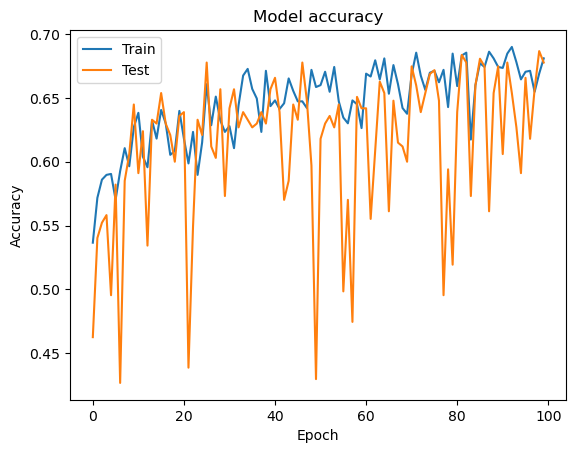

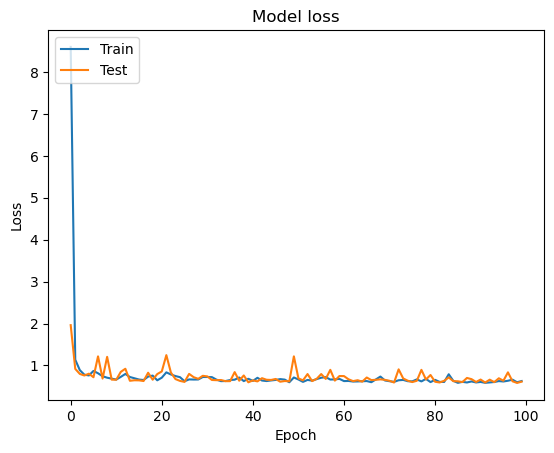

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Support Vector Machine (SVM) Classifier Setup, Training, and Evaluation

In this section, we implement a Support Vector Machine (SVM) classifier to predict whether sheep are sick based on various physiological parameters. SVM is known for its effectiveness in high-dimensional spaces and its ability to model non-linear decision boundaries using different kernel functions.

In [12]:
# Create a SVM classifier
svm_model = SVC(kernel='linear')  # You can change the kernel to 'rbf', 'poly', etc., based on your data

# Train the model
svm_model.fit(X_train, y_train_numeric)

# Evaluate the model
evaluate_model(svm_model, X_test, y_test_numeric)

Accuracy: 0.6379
Precision: 0.5824
Recall: 0.1927
F1 Score: 0.2896
ROC AUC: 0.5535


# Gaussian Naive Bayes Classifier Implementation and Evaluation

This section details the implementation of a Gaussian Naive Bayes (NB) classifier for predicting whether sheep are exhibiting symptoms of illness. The Naive Bayes classifier applies Bayes' theorem with the assumption of independence between predictors. Gaussian NB is particularly suited for continuous input variables and assumes that the features follow a normal distribution.

In [13]:
# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train_numeric)

# Evaluate the model
evaluate_model(nb_model, X_test, y_test_numeric)

Accuracy: 0.6908
Precision: 0.7524
Recall: 0.2873
F1 Score: 0.4158
ROC AUC: 0.6143


# Preparing Data and Configuring LSTM Neural Network for Classification

In this section, we configure an LSTM neural network to classify whether sheep are showing symptoms of illness. LSTMs are particularly suited for sequence prediction problems due to their ability to retain information over long periods, making them ideal for time-series data or cases where the temporal sequence of data points is crucial.

In [14]:
# Convert DataFrame to NumPy array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Now, reshape the data for LSTM [samples, time steps, features]
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], X_train_array.shape[1], 1))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1))

model = Sequential([
    # LSTM layer with 50 units, relu activation; adjust based on your needs
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])

model.summary()

C:\Anaconda\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

# Training the LSTM Neural Network

After configuring the LSTM model, the next critical step is training it on the prepared dataset. This process involves feeding the reshaped training data to the model and iteratively adjusting the internal parameters to minimize the prediction error.

In [15]:
# Train the model
history = model.fit(
    X_train_reshaped,
    y_train_numeric,
    epochs=100,  # Number of epochs; adjust based on observations
    batch_size=32,  # Batch size; adjust as needed
    validation_split=0.2,  # Using part of the training set for validation
    verbose=1
)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - Precision: 0.4230 - Recall: 0.5817 - accuracy: 0.5183 - loss: 2.1314 - val_Precision: 0.3853 - val_Recall: 0.3158 - val_accuracy: 0.5284 - val_loss: 0.6802
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.4661 - Recall: 0.2077 - accuracy: 0.5959 - loss: 0.6651 - val_Precision: 0.6875 - val_Recall: 0.0827 - val_accuracy: 0.6209 - val_loss: 0.6551
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.6526 - Recall: 0.1238 - accuracy: 0.6329 - loss: 0.6424 - val_Precision: 0.6111 - val_Recall: 0.1654 - val_accuracy: 0.6269 - val_loss: 0.6376
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.5934 - Recall: 0.2200 - accuracy: 0.6455 - loss: 0.6284 - val_Precision: 0.8000 - val_Recall: 0.1805 - val_accuracy: 0.6567 - val_loss: 0.6254
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.5946 - Recall: 0.2564 - accuracy: 0.6552 - loss: 0.5969 - val_Precision: 0.5566 - val_Recall: 0.4

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.7713 - Recall: 0.6511 - accuracy: 0.7983 - loss: 0.3772 - val_Precision: 0.7232 - val_Recall: 0.6090 - val_accuracy: 0.7522 - val_loss: 0.4283
Epoch 35/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.7598 - Recall: 0.5923 - accuracy: 0.7778 - loss: 0.4108 - val_Precision: 0.7364 - val_Recall: 0.7143 - val_accuracy: 0.7851 - val_loss: 0.4217
Epoch 36/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Precision: 0.7680 - Recall: 0.7181 - accuracy: 0.8006 - loss: 0.3879 - val_Precision: 0.8025 - val_Recall: 0.4887 - val_accuracy: 0.7493 - val_loss: 0.4184
Epoch 37/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Precision: 0.7721 - Recall: 0.6683 - accuracy: 0.7901 - loss: 0.3752 - val_Precision: 0.6757 - val_Recall: 0.7519 - val_accuracy: 0.7582 - val_loss: 0.4333
Epoch 38/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.7930 - Recall: 0.6692 - accuracy: 0.8101 - loss: 0.3796 - val_Precision: 0.7209 - val_Recall: 0.6992 - val

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.7962 - Recall: 0.7474 - accuracy: 0.8300 - loss: 0.3247 - val_Precision: 0.8295 - val_Recall: 0.5489 - val_accuracy: 0.7761 - val_loss: 0.4176
Epoch 68/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.8845 - Recall: 0.6741 - accuracy: 0.8456 - loss: 0.3143 - val_Precision: 0.8621 - val_Recall: 0.5639 - val_accuracy: 0.7910 - val_loss: 0.4590
Epoch 69/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.8645 - Recall: 0.6609 - accuracy: 0.8312 - loss: 0.3337 - val_Precision: 0.6448 - val_Recall: 0.8872 - val_accuracy: 0.7612 - val_loss: 0.4778
Epoch 70/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.8150 - Recall: 0.7848 - accuracy: 0.8498 - loss: 0.3007 - val_Precision: 0.7522 - val_Recall: 0.6391 - val_accuracy: 0.7731 - val_loss: 0.4334
Epoch 71/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.7947 - Recall: 0.7577 - accuracy: 0.8306 - loss: 0.3291 - val_Precision: 0.8125 - val_Recall: 0.5865 - val

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Precision: 0.8310 - Recall: 0.7695 - accuracy: 0.8573 - loss: 0.2784 - val_Precision: 0.7542 - val_Recall: 0.6692 - val_accuracy: 0.7821 - val_loss: 0.4401


# Evaluating the LSTM Neural Network on Test Data

After training the LSTM model, it is critical to assess its performance on an independent test set to evaluate its generalizability and effectiveness in making predictions on unseen data. This step is crucial for understanding the model's practical applicability.

In [16]:
# Evaluate the model on the test data
test_results = model.evaluate(X_test_reshaped, y_test_numeric, verbose=1)

print(f"Test Loss: {test_results[0]}")
print(f"Test Accuracy: {test_results[1]}")
print(f"Test Precision: {test_results[2]}")
print(f"Test Recall: {test_results[3]}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.7181 - Recall: 0.6580 - accuracy: 0.7789 - loss: 0.4468 
Test Loss: 0.4421212077140808
Test Accuracy: 0.7682403326034546
Test Precision: 0.6509090662002563
Test Recall: 0.7910863757133484


# Setting Up and Evaluating K-Nearest Neighbors Classifier

This section details the steps to implement and assess the K-Nearest Neighbors (KNN) classifier for predicting sheep health status based on physiological data. KNN is a non-parametric, instance-based learning algorithm where the output is determined based on the majority vote of the nearest neighbors of each point.

In [17]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=9)

# Fit the model on the scaled training data
knn.fit(X_train_scaled, y_train_numeric)

# Now, evaluate the model
evaluate_model(knn, X_test_scaled, y_test_numeric)


Accuracy: 0.8022
Precision: 0.7930
Recall: 0.6545
F1 Score: 0.7171
ROC AUC: 0.7742


# Optimizing K-Nearest Neighbors Classifier with GridSearchCV

This section of the notebook demonstrates how to fine-tune the parameters of a K-Nearest Neighbors (KNN) classifier using GridSearchCV. The goal is to identify the optimal number of neighbors (n_neighbors) that provides the highest accuracy for predicting the health status of sheep based on physiological data.

In [18]:
# Define the parameter grid: n_neighbors from 1 to 20
param_grid = {'n_neighbors': range(1, 21)}

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train_numeric)

# Best parameter and score
print(f"Best Parameter: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Evaluate the best model found by GridSearchCV
best_knn = grid_search.best_estimator_
evaluate_model(best_knn, X_test_scaled, y_test_numeric)

Best Parameter: {'n_neighbors': 9}
Best Score: 0.8117079274287246
Accuracy: 0.8022
Precision: 0.7930
Recall: 0.6545
F1 Score: 0.7171
ROC AUC: 0.7742


# Conclusion

The notebook concludes with insights into which models perform best based on the given data and the practical implications of these results for managing sheep health. We also suggest areas for further research, such as incorporating more diverse data points and testing more complex models.